# Tópicos

1. Datasets & DataLoaders

2. Carregando um Dataset

3. Iterando e Visualizando o Dataset

4. Criando um Dataset customizado para arquivos
    * \_\_init__
    * \_\_getitem__

5. Preparando os dados para treinamento com DataLoaders

6. Iterar sobre o DataLoaders

# Datasets & DataLoaders

PyTorch possui 2 formas para lidar com dados:

* ```torch.utils.data.DataLoader```
* ```torch.utils.data.Dataset```

Essas funções perimitem trabalhar com dataset pré-carregados ou dados próprios.

```Dataset``` armazena amostras e o label correspondente
```DataLoader``` fornece meios para acessar as amostras

Datasets pré-carregados estão disponíveis em: [Image Datasets](https://pytorch.org/vision/stable/datasets.html) | [Text Datasets](https://pytorch.org/text/stable/datasets.html) | [Audio Datasets](https://pytorch.org/audio/stable/datasets.html)

# Carregando um Dataset

Para utilizar um dataset pré-carregado. Utiliza-se a função com os seguintes parâmetros:

```root```: caminho onde os dados de treinos e testes serão armazenados

```train```: especifica o dataset de treino ou teste

```download=True```: baixa o dataset

```transform```: and ```target_transform```: especifica as transformações de feature e label

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=False,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=False,
    transform=ToTensor()
)

# Iterando e Visualizando o Dataset

O ```Datasets``` podem ser indexados manualmente com: ```training_data[index]```

```matplotlib``` pode ser usado para visualização de amostras

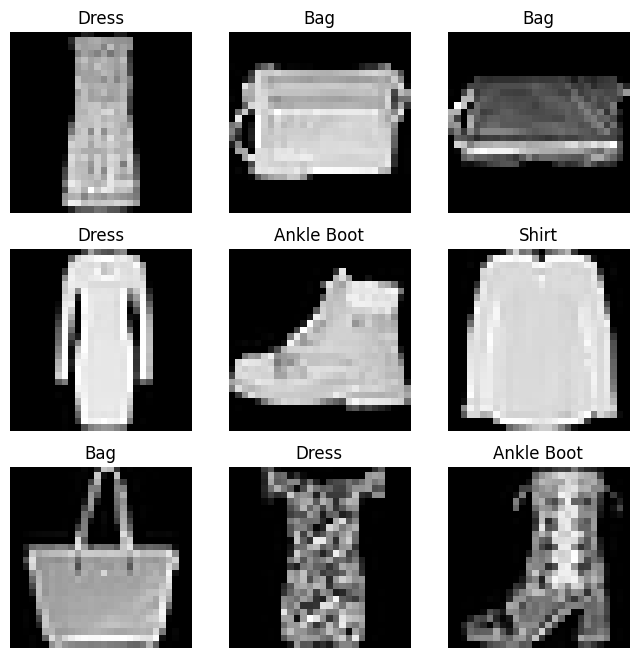

In [3]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

# Criando um Dataset Customizado para arquivos

Um dataset customizado deve implementar 3 funções: \_\_init__, \_\_len__ e \_\_getitem__.

Para exemplo, no FashionMNIST, imagens são armazenados no diretório ```ìmg_dir``` e as labels em ```annotations_file```

In [4]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#### ```__init__```

A função ```\_\_init__``` roda uma vez quando há a inicialização do objeto do Dataset

```__geiitem__```

A função ```__getiitem__``` carrega e retorna amostras de um dataset dados um index.

Baseado no index, ela identifica a localização da imagem no disco, converte para tensor usando ```decode_image```, recupera o label do csv em ```self.img_labels```, chama as funções de transformação e retorna o tensor da imagem o correspondente label na tupla.

# Preparando os dados para treinamento com DataLoaders

O ```Dataset``` recupera as feature e labels uma amostra por vez.

No treinamento de um modelo, é desejado passar amostras em 'minibatches', redistribuir os dados a cada época para reduzir overfitting e usar ```multiprocessing```para acelerar a recuperação de dados.

In [5]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Iterar sobre DataLoader

Carregado o dataset no DataLoader, pode-se iterar o dataset como necessário.

Cada iteração retorna um batch de ```train_features```e ```train_labels``` (contendo ```batch_size=64```).

Como há a especificação ```shuffle=True```, os dados são embaralhados após a iteração de todos batches.

Ordem de carregamento dos dados: [Samplers](https://pytorch.org/docs/stable/data.html#data-loading-order-and-sampler)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


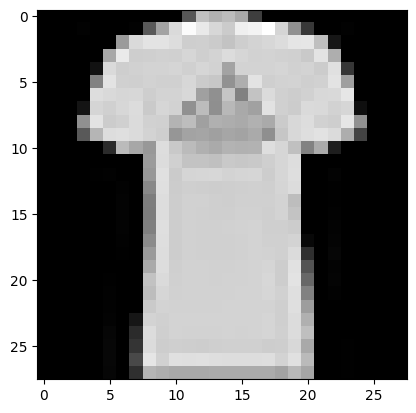

Label: 0


In [6]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")